In [5]:
# get the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

runs = pd.read_table('/home/kal/jLab/poisson/poisson_data.csv', sep=',')
runs.head()

,100/sec,10/sec,5/sec,1/sec,0/sec
0,95,11,5,2,0
1,102,17,5,0,4
2,101,9,2,1,2
3,87,15,4,0,1
4,90,8,8,3,0


In [6]:
# graph a cumulative average
for rate in ['100/sec', '10/sec', '5/sec', '1/sec', '0/sec']:
    mylist=runs[rate]
    moving_avg=list()
    for N in range(len(mylist)):
        moving_avg.append(np.mean(mylist[:N+1]))
    runs[rate+'_avg'] = moving_avg
runs.head()

,100/sec,10/sec,5/sec,1/sec,0/sec,100/sec_avg,10/sec_avg,5/sec_avg,1/sec_avg,0/sec_avg
0,95,11,5,2,0,95.000000,11.000000,5.0,2.00,0.00
1,102,17,5,0,4,98.500000,14.000000,5.0,1.00,2.00
2,101,9,2,1,2,99.333333,12.333333,4.0,1.00,2.00
3,87,15,4,0,1,96.250000,13.000000,4.0,0.75,1.75
4,90,8,8,3,0,95.000000,12.000000,4.8,1.20,1.40


systematic error: 0.91 +- 0.03


/home/kal/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in double_scalars


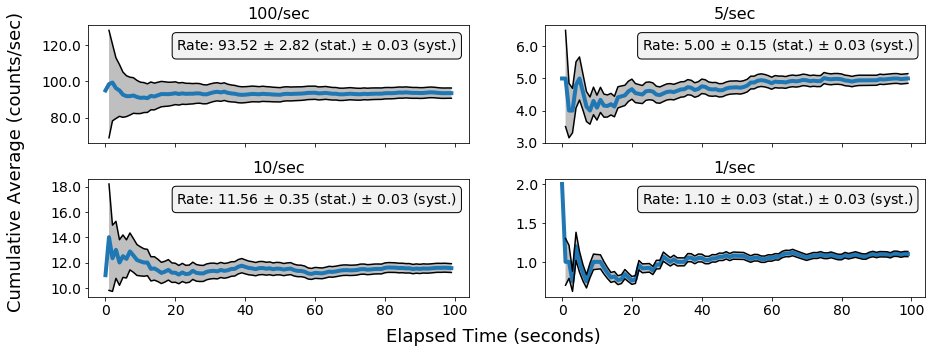

In [187]:
# make plots
from matplotlib.ticker import FormatStrFormatter

rates = ['100/sec', '10/sec', '5/sec', '1/sec']

# 0/sec gives systematic uncertainty
system_err = np.asarray(runs['0/sec_avg'])[-1]
# we want the upper bounds 
system_err_up = 0.3*system_err/np.sqrt(len(runs['0/sec_avg']))
print('systematic error: {:.2f} +- {:.2f}'.format(system_err, system_err_up))


fig, ax=plt.subplots(2, 2, figsize=(15,5),sharex=True)
bbox = dict(boxstyle="round", fc="0.95")
for i in range(len(rates)):
    if i %2 == 0:
        my_ax=ax[0]
    else:
        my_ax=ax[1]
    if i < 2:
        my_ax = my_ax[0]
    else:
        my_ax = my_ax[1]
    # get the data
    my_rate = rates[i]
    data = runs[my_rate]

    my_ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    data = np.asarray(runs[rates[i]+'_avg'])
    # get errors (percent for time)
    errors = [0.3*data[j]/np.sqrt(j) for j in range(len(data))]

    
    #plot things
    my_ax.plot(data, linewidth=4)
    my_ax.plot(data+errors, c='black')
    my_ax.fill_between(range(len(data)), data+errors, data-errors, facecolor='grey', alpha=0.5)
    
    #lables
    #if rates[i] == '100/sec':
    if False:
         my_ax.annotate('Rate: {:.1f} '.format(data[-1]) + r'$ \pm $' + ' {:.1f} (stat.) '.format(errors[-1]) 
                       + r'$ \pm $' + ' {:.1f} (syst.)'.format(system_err_up), xy=(.97, .9), xycoords='axes fraction',
            size=14, ha='right', va='top', bbox=bbox)
    else:
        my_ax.annotate('Rate: {:.2f} '.format(data[-1]) + r'$ \pm $' + ' {:.2f} (stat.) '.format(errors[-1]) 
                       + r'$ \pm $' + ' {:.2f} (syst.)'.format(system_err_up), xy=(.97, .9), xycoords='axes fraction',
            size=14, ha='right', va='top', bbox=bbox)
    my_ax.plot(data-errors, c='black')
    my_ax.set_title(rates[i])
    for item in ([my_ax.xaxis.label, my_ax.yaxis.label] +
             my_ax.get_xticklabels() + my_ax.get_yticklabels()):
        item.set_fontsize(14)
    my_ax.title.set_fontsize(16)

        
fig.text(0.05, 0.5, 'Cumulative Average (counts/sec)', va='center', rotation='vertical', size=18)
fig.subplots_adjust(hspace=.3)

#plt.title('Cuculative Averages for Several Rates of Gamma Ray Emmission')
fig.text(0.5, 0, 'Elapsed Time (seconds)', ha='center', size=18)
plt.show()

/home/kal/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app


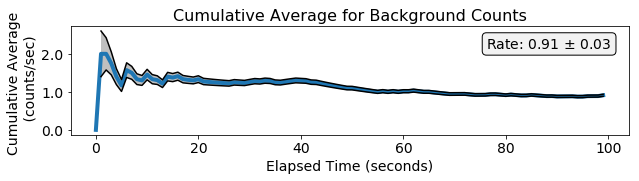

In [210]:
# make plots
rates = ['0/sec']

fig, ax=plt.subplots(1, 1, figsize=(10,2))
bbox = dict(boxstyle="round", fc="0.95")
for i in range(len(rates)):
    my_ax=ax
    # get the data
    my_rate = rates[i]
    data = runs[my_rate]

    my_ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    data = np.asarray(runs[rates[i]+'_avg'])
    # get errors (percent for time)
    errors = [0.3*data[j]/np.sqrt(j) for j in range(len(data))]

    
    #plot things
    my_ax.plot(data, linewidth=4)
    my_ax.plot(data+errors, c='black')
    my_ax.fill_between(range(len(data)), data+errors, data-errors, facecolor='grey', alpha=0.5)
    
    #lables
    #if rates[i] == '100/sec':
    if False:
         my_ax.annotate('Rate: {:.1f} '.format(data[-1]) + r'$ \pm $' + ' {:.1f} (stat.) '.format(errors[-1]) 
                       + r'$ \pm $' + ' {:.1f} (syst.)'.format(system_err_up), xy=(.97, .9), xycoords='axes fraction',
            size=14, ha='right', va='top', bbox=bbox)
    else:
        my_ax.annotate('Rate: {:.2f} '.format(data[-1]) + r'$ \pm $' + ' {:.2f}'.format(errors[-1]), xy=(.97, .9), xycoords='axes fraction',
            size=14, ha='right', va='top', bbox=bbox)
    my_ax.plot(data-errors, c='black')
    my_ax.set_title(rates[i])
    my_ax.set_ylabel('Cumulative Average \n (counts/sec)')
    my_ax.set_xlabel('Elapsed Time (seconds)')
    for item in ([my_ax.xaxis.label, my_ax.yaxis.label] +
             my_ax.get_xticklabels() + my_ax.get_yticklabels()):
        item.set_fontsize(14)
    my_ax.title.set_fontsize(16)

        
fig.subplots_adjust(hspace=.3)

plt.title('Cumulative Average for Background Counts', size=16)
plt.show()

In [76]:
long_runs=pd.read_table('/home/kal/jLab/poisson/poisson_data_full.csv', sep=',')
long_runs.head()
long_runs = long_runs/100

In [234]:
# look at mean and stdevs
means = {}
stds = {}

rates = ['100/sec', '10/sec', '5/sec', '1/sec']
for r in rates:
    means['short_' + r.split('/')[0]] = np.mean(runs[r]) 
    stds['short_' + r.split('/')[0]] = np.std(runs[r])
    means['long_' + r.split('/')[0]] = np.mean(long_runs[r]) 
    stds['long_' + r.split('/')[0]] = np.std(long_runs[r])
    
print(means)
print(stds)
    
run_stats = pd.DataFrame({'means':means, 'stds':stds})

{'short_10': 11.56, 'long_10': 11.875, 'long_5': 5.2175, 'short_5': 5.0, 'short_100': 93.52, 'short_1': 1.1, 'long_1': 1.1325, 'long_100': 93.345}
{'short_10': 3.047359512758545, 'long_10': 0.49792067641342236, 'long_5': 0.31067466906717695, 'short_5': 1.8814887722226779, 'short_100': 10.09998019800039, 'short_1': 1.0535653752852738, 'long_1': 0.12557368354874363, 'long_100': 1.2070314826051518}


In [235]:
print(run_stats)

             means       stds
long_1      1.1325   0.125574
long_10    11.8750   0.497921
long_100   93.3450   1.207031
long_5      5.2175   0.310675
short_1     1.1000   1.053565
short_10   11.5600   3.047360
short_100  93.5200  10.099980
short_5     5.0000   1.881489


100/sec
0.5773502691896257
0.2773500981126146
10/sec
1.0
0.28867513459481287
5/sec
1.0
0.21320071635561044
1/sec
0.7071067811865476
0.16903085094570333


/home/kal/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:26: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/home/kal/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in true_divide
/home/kal/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in true_divide


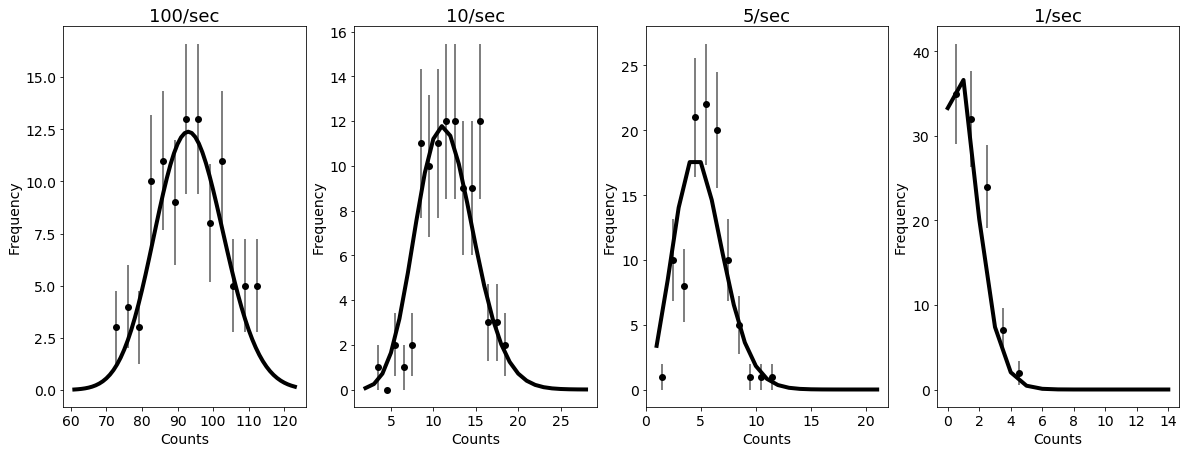

In [242]:
# make more plots
from scipy.stats import poisson, norm
fig, ax = plt.subplots(1, 4, figsize=(20,7))
bins = [15, 1, 1, 1]


for i in range(len(rates)):
    # get the plot to use
    if i %2 == 0:
        my_ax=ax[0]
    else:
        my_ax=ax[1]
    #if i < 2:
    #    my_ax = my_ax[0]
    #else:
    #    my_ax = my_ax[1]
    my_ax=ax[i]
    # get the data
    my_rate = rates[i]
    data = runs[my_rate]

    
    # get the bins
    print(my_rate)
    if my_rate=='100/sec':
        bins=np.linspace(np.min(data), np.max(data), (np.max(data)-np.min(data)+1)/3)
        scale = 100*3
    else:
        bins = np.linspace(np.min(data), np.max(data), np.max(data)-np.min(data)+1)
        scale = 100


    #plot the data
    counts,bin_edges = np.histogram(data, bins=bins, density=False)
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
    err = np.sqrt(counts)
    my_ax.errorbar(bin_centres, counts, yerr=err, fmt='.', c='black', ecolor='grey', capsize=0, elinewidth=2, markeredgewidth=2, ms=10)
    
    #plot the distribution
    mu=np.mean(data)
    x = np.arange(min(abs(min(data)-5), abs(min(data)-10), poisson.ppf(0.01, mu)), max(max(data)+10, poisson.ppf(0.99, mu)))
    my_ax.plot(x, scale*poisson.pmf(x, mu), c='black', ms=8, linewidth=4)
    my_ax.set_xlabel('Counts')
    my_ax.set_ylabel('Frequency')
    my_ax.set_title(my_rate)
    
    for item in ([my_ax.xaxis.label, my_ax.yaxis.label] +
             my_ax.get_xticklabels() + my_ax.get_yticklabels()):
        item.set_fontsize(14)
    my_ax.title.set_fontsize(18)
    
    
    fig.subplots_adjust(hspace=.3)

    
    #make it pretty

    
    print(max(err/counts))
    print(min(err/counts))
    

In [177]:
# test max of 1/sec distribution
p=max(runs['1/sec'])
print(p)
dist = poisson(np.mean(runs['1/sec']))
#probabliylt hightest value is 4
1 - dist.cdf(p) ** 100


5


0.09229215281333725

5.0
93.52


Text(0.05,0.5,'Chi Squared \n     Possion: 51.2, p=0.060\n     Gaussian: 52.30, p=0.045$ \\pm $ 0.03')

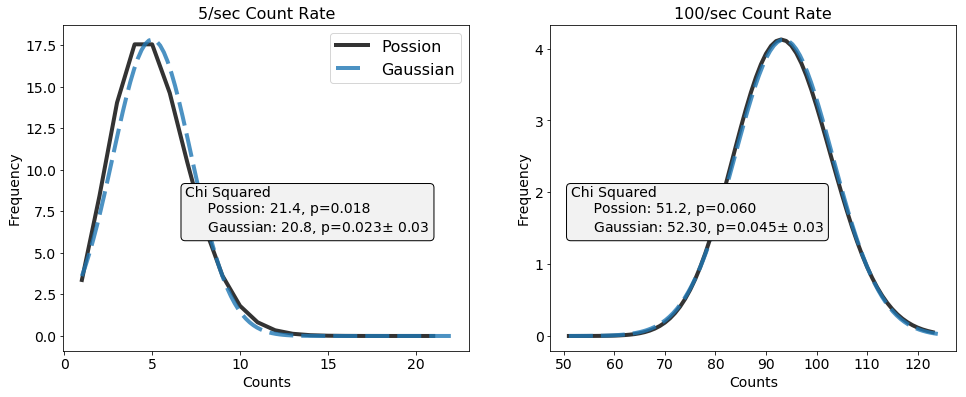

In [230]:
# plot gaussian and poission
import math
import matplotlib.mlab as mlab
import scipy.stats as stats

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
rates = ['5/sec', '100/sec']
for i in range(len(rates)):
    data = runs[rates[i]]
    # plot poission
    mu=np.mean(data)
    print(mu)
    x = np.arange(min(abs(min(data)-5), abs(min(data)-20), poisson.ppf(0.01, mu)), max(max(data)+10, poisson.ppf(0.99, mu)))
    ax[i].plot(x, 100*poisson.pmf(x, mu), c='black', ms=8, linewidth=4, alpha=0.8, label='Possion')
    # plot gaussian
    x = np.linspace(min(abs(min(data)-5), abs(min(data)-20), poisson.ppf(0.01, mu)), max(max(data)+10, poisson.ppf(0.99, mu)), 100)
    ax[i].plot(x, 100*stats.norm.pdf(x, mu, np.sqrt(mu)), linewidth=4, alpha=0.8, dashes=[6, 2], label='Gaussian')
    ax[i].set_title('{} Count Rate'.format(rates[i]))
    ax[i].set_xlabel('Counts')
    ax[i].set_ylabel('Frequency')
    ax[0].legend(fontsize=16)
    my_ax=ax[i]
    for item in ([my_ax.xaxis.label, my_ax.yaxis.label] +
             my_ax.get_xticklabels() + my_ax.get_yticklabels()):
        item.set_fontsize(14)
    my_ax.title.set_fontsize(16)


fig.subplots_adjust(hspace=.3)

    
ax[0].annotate('Chi Squared \n     Possion: 21.4, p=0.018\n     Gaussian: 20.8, p=0.023'.format() + r'$ \pm $' + ' {:.2f}'.format(errors[-1]), xy=(.3, .5), xycoords='axes fraction',
            size=14, ha='left', va='top', bbox=bbox)
ax[1].annotate('Chi Squared \n     Possion: 51.2, p=0.060\n     Gaussian: 52.30, p=0.045'.format() + r'$ \pm $' + ' {:.2f}'.format(errors[-1]), xy=(.05, .5), xycoords='axes fraction',
            size=14, ha='left', va='top', bbox=bbox)

In [211]:
# compute chi squared's
def chi_squared(x, fit, sig):
     return np.sum(np.square(x-fit)/np.square(sig))
    
def reduced_chi_squared(x, fit, sig, N_samples, n_fitparams):
    print ('d' + str(N_samples-n_fitparams))
    return chi_squared(x, fit, sig)/(N_samples-n_fitparams)
    
mu_change = {'5/sec':(.154, .151), '100/sec':(1.84, 1.942)}

for rate in ['5/sec', '100/sec']:
    data = runs[rate]
    # get the bins
    bins = np.linspace(np.min(data), np.max(data), np.max(data)-np.min(data)+1)
    counts, bin_edges = np.histogram(data, bins=bins, density=False)
    
    # only for nonzero
    counts = [c for c in counts if c > 0]
    bin_edges = [b for b,c in zip(bin_edges, counts) if c > 0]
    err = np.sqrt(counts)
    
    mu=np.mean(data)
    mu_up = mu+mu_change[rate]
    mu_down= mu-mu_change[rate]
    
    p_vals = 100*poisson.pmf(bin_edges, mu)
    p_vals_up = 100*poisson.pmf(bin_edges, mu+mu_change[rate][0])
    p_vals_down = 100*poisson.pmf(bin_edges, mu-mu_change[rate][0])
    g_vals = 100*stats.norm.pdf(bin_edges, mu, np.sqrt(mu))
    g_vals_up = 100*stats.norm.pdf(bin_edges, mu+mu_change[rate][1], np.sqrt(mu+mu_change[rate][1]))
    g_vals_down = 100*stats.norm.pdf(bin_edges, mu-mu_change[rate][1], np.sqrt(mu-mu_change[rate][1]))

    
    # get chis
    gchi = chi_squared(counts, g_vals, err)
    pchi = chi_squared(counts, p_vals, err)
    gchi_up = chi_squared(counts, g_vals_up, err)
    pchi_up = chi_squared(counts, p_vals_up, err)
    gchi_down = chi_squared(counts, g_vals_down, err)
    pchi_down = chi_squared(counts, p_vals_down, err)

    print('Chi Squared, Poisson, {}:{:.2f} +- {:.2f}'.format(rate, pchi, (pchi_up+pchi_down-2*pchi)/2))
    print('Reduced Chi Squared:{}'.format(reduced_chi_squared(counts, p_vals, err, len(counts), 1)))
    print('Mu bound {}: {:.2f} +- {:.2f}\n'.format(rate, mu, mu_change[rate][0]))
    print('Chi Squared, Gaussian, {}:{:.2f} +- {:.2f}'.format(rate, gchi, (gchi_up+gchi_down-2*gchi)/2))
    print('Reduced Chi Squared:{}'.format(reduced_chi_squared(counts, g_vals, err, len(counts), 1)))
    print('Mu bound {}: {:.2f} +- {:.2f}\n\n'.format(rate, mu, mu_change[rate][1]))

Chi Squared, Poisson, 5/sec:21.41 +- 1.01
d10
Reduced Chi Squared:2.1410173089016933
Mu bound 5/sec: 5.00 +- 0.15

Chi Squared, Gaussian, 5/sec:20.79 +- 1.00
d10
Reduced Chi Squared:2.0786582639226747
Mu bound 5/sec: 5.00 +- 0.15


Chi Squared, Poisson, 100/sec:51.19 +- 1.00
d37
Reduced Chi Squared:1.3836221865218172
Mu bound 100/sec: 93.52 +- 1.84

Chi Squared, Gaussian, 100/sec:52.30 +- 1.00
d37
Reduced Chi Squared:1.4136203875502895
Mu bound 100/sec: 93.52 +- 1.94




In [192]:
# simulated runs
sims = pd.read_table('/home/kal/jLab/poisson/poisson_data_sim.csv', delimiter=',')
sims.head()

,1_mean,1_std,5_mean,5_std,10_mean,10_std,100_mean,100_std
0,1.22,1.18,5.03,2.06,11.34,3.43,93.60,10.22
1,1.18,1.05,5.12,2.38,11.62,3.80,93.43,9.47
2,1.18,0.99,4.91,2.07,11.86,2.97,93.84,10.12
3,1.18,0.87,4.81,1.97,11.52,3.19,91.59,9.37
4,1.09,1.06,4.92,2.00,15.88,3.08,93.64,9.47


In [193]:
# Determine the error on mu and sigma from the scatter of the ten distributions
for rate in [1, 5, 10, 100]:
    print('Mean for {}/sec: {:.2f} +- {:.2f} (standard deviation)'.format(rate, np.mean(sims[str(rate) + '_mean']), np.std(sims[str(rate) + '_mean'])))
    print('Standard Deviation for {}/sec: {:.2f} +- {:.2f} (standard deviation) \n'.format(rate, np.mean(sims[str(rate) + '_std']), np.std(sims[str(rate) + '_std'])))


Mean for 1/sec: 1.14 +- 0.10 (standard deviation)
Standard Deviation for 1/sec: 1.05 +- 0.09 (standard deviation) 

Mean for 5/sec: 4.90 +- 0.11 (standard deviation)
Standard Deviation for 5/sec: 2.11 +- 0.14 (standard deviation) 

Mean for 10/sec: 12.14 +- 1.27 (standard deviation)
Standard Deviation for 10/sec: 3.38 +- 0.29 (standard deviation) 

Mean for 100/sec: 93.31 +- 0.79 (standard deviation)
Standard Deviation for 100/sec: 9.82 +- 0.58 (standard deviation) 



In [48]:
# oberserved variences (with proper error propegation)

def error_on_std(s, delta_s):
    return s**2*(delta_s)/s*np.sqrt(2)

for r in [1,5,10,100]:
    s = run_stats['stds']['short_{}'.format(r)]
    print('Rate {} : Varience {}'.format(r, s**2))

Rate 1 : Varience 1.1099999999999999
Rate 5 : Varience 3.5399999999999996
Rate 10 : Varience 9.286399999999997
Rate 100 : Varience 102.00959999999999


In [46]:
run_stats['stds']

long_1        0.125574
long_10       0.497921
long_100      1.207031
long_5        0.310675
short_1       1.053565
short_10      3.047360
short_100    10.099980
short_5       1.881489
Name: stds, dtype: float64

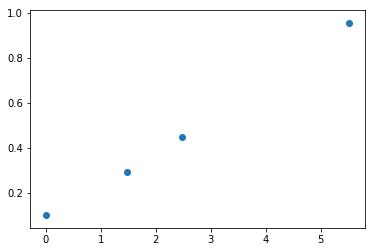

In [74]:
means = [run_stats['means']['short_{}'.format(r)] for r in [100,10,5, 1]]
distances = [0, 1.48, 2.48, 5.52]
a=0.01
plt.scatter(distances, 1/np.sqrt(means))
plt.show()